#  <font color=#8A0808><center><span style="border:1px solid black;"> -Computational Statistics Week 2- </center></font>
###  <font color=#045FB4><b>LE MEUR Vincent</b></font>

# <b>Travaux sur les exercices 3.1, 3.4, 5.1 et 5.2  en utilisant le language R </b>

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Exercice 3.1 

On considère ici l'estimateur bayésien suivant : 
$$\delta(x) =  \dfrac{\int_{-\infty}^{+\infty} {\dfrac {\theta}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}d\theta}}{\int_{-\infty}^{+\infty} {\dfrac {1}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}d\theta}}$$

<b>  a) Traçons les intégrandes  et utilisons une méthode d'intégration de Monte Carlo pour déterminer les intégrales</b>

On considère $g1(\theta,x)=\dfrac {\theta}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}$ et $g2(\theta,x)=\dfrac {1}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}$

On trâce ces intégrandes en prenant x = 0, 5,10,20,50

Tout d'abbord l'intégrande  g1 :

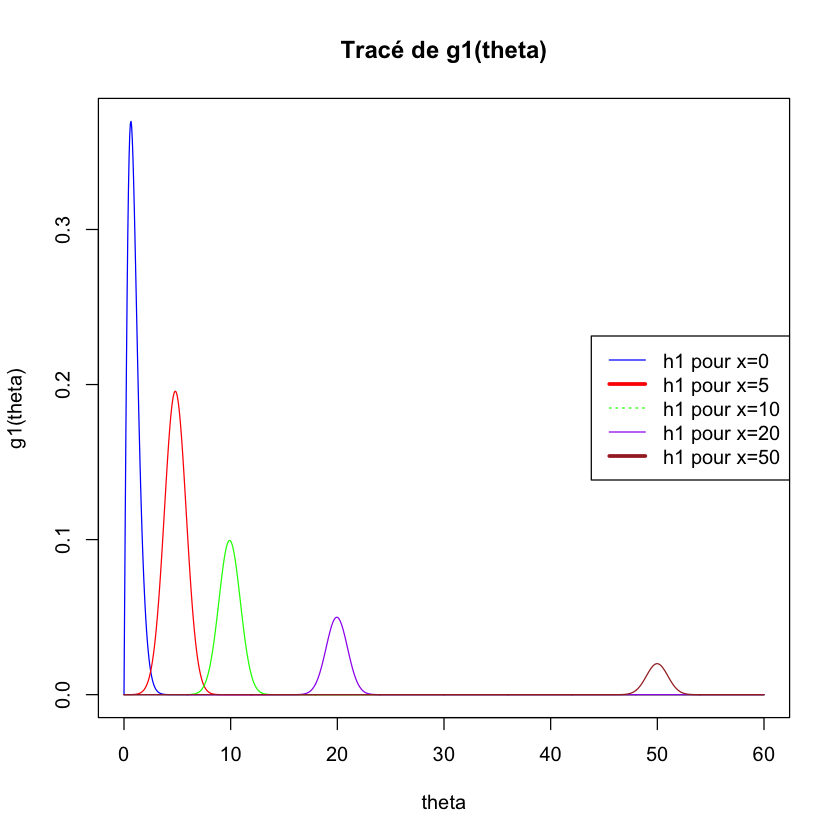

In [2]:
nt <- 1000
x<-c(0,5,10,20,50)
theta <- seq(0, 60, length = nt)
plot(theta,theta/(1+theta^2)*exp(-(x[1]-(theta))^2/(2)),type="l",main="Tracé de g1(theta)",col="blue",ylab="g1(theta)")
lines(theta,theta/(1+theta^2)*exp(-(x[2]-(theta))^2/(2)),col="red")
lines(theta,theta/(1+theta^2)*exp(-(x[3]-(theta))^2/(2)),col="green")
lines(theta,theta/(1+theta^2)*exp(-(x[4]-(theta))^2/(2)),col="purple")
lines(theta,theta/(1+theta^2)*exp(-(x[5]-(theta))^2/(2)),col="brown")





legend("right", # la position sur le graphique
          c("h1 pour x=0" ,"h1 pour x=5","h1 pour x=10","h1 pour x=20","h1 pour x=50"), # le texte pour chaque courbe
          col=c("blue", "red","green","purple","brown"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )


Puis  h2 :

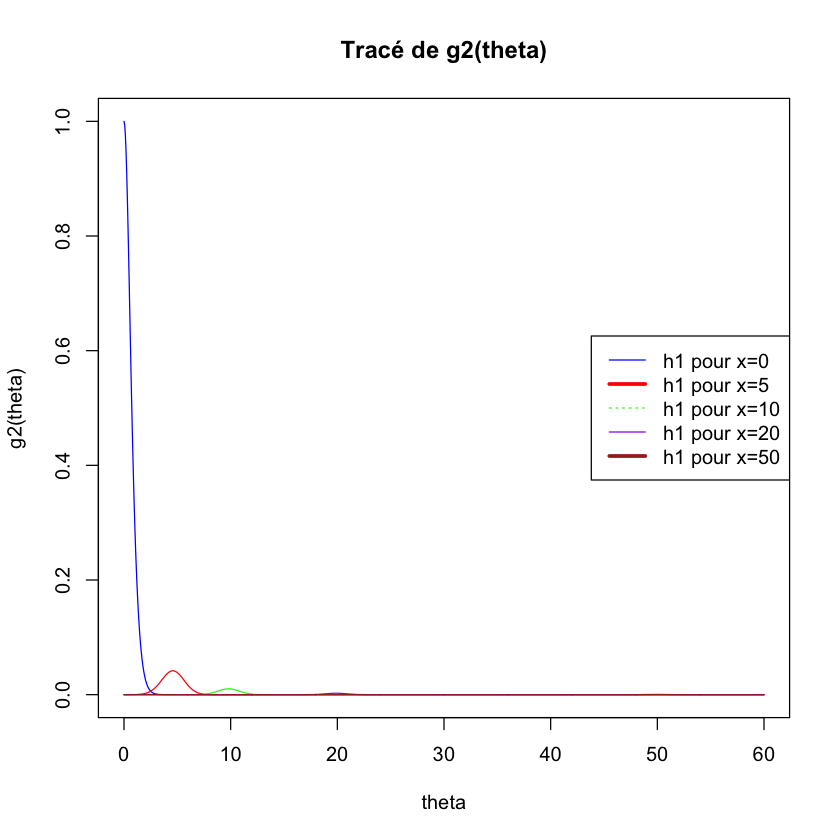

In [3]:
nt <- 1000
x<-c(0,5,10,20,50)
theta <- seq(0, 60, length = nt)
plot(theta,1/(1+theta^2)*exp(-(x[1]-(theta))^2/(2)),type="l",main="Tracé de g2(theta)",col="blue",ylab="g2(theta)")
lines(theta,1/(1+theta^2)*exp(-(x[2]-(theta))^2/(2)),col="red")
lines(theta,1/(1+theta^2)*exp(-(x[3]-(theta))^2/(2)),col="green")
lines(theta,1/(1+theta^2)*exp(-(x[4]-(theta))^2/(2)),col="purple")
lines(theta,1/(1+theta^2)*exp(-(x[5]-(theta))^2/(2)),col="brown")





legend("right", # la position sur le graphique
          c("h1 pour x=0" ,"h1 pour x=5","h1 pour x=10","h1 pour x=20","h1 pour x=50"), # le texte pour chaque courbe
          col=c("blue", "red","green","purple","brown"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )


On constate que ces intégrandes ont un extrema unique localisé.

Appliquons à présent une méthode de MonteCarlo pour estimer ces deux intégrales puis leur quotient pour déterminer l'estimateur bayésien  $\delta(x)$.

On considère $(\theta_1,...,\theta_n)   \thicksim \mathcal{N}(x,1) $ un n-échantillon normal

On peut alors estimer nos deux intégrales à partir de cet échantillon par : 
$$ \widehat{\delta_1} =\dfrac{1}{n} \sum_{i=1}^{n}{\dfrac {\theta_i}{1+\theta_i^2}} \\
\widehat{\delta_2} =\dfrac{1}{n} \sum_{i=1}^{n}{\dfrac {1}{1+\theta_i^2}} $$

On a d'après la loi forte des grands nombres que ces deux quantités convergent respectivement vers le numérateur et le dénominateur de $\delta(x)$

Nous allons générer pour x=5  un échantillon normal puis estimer nos deux intégrales

In [4]:
delta1=0
delta2=0
n=130000
x=5
k=1
theta <- c(rnorm(n, mean = x, sd = 1))
repeat {
    delta1=delta1 + (theta[k])/(1+theta[k]^2)
    delta2=delta2 + (1)/(1+theta[k]^2)
    k<-k+1
    if (k==n) break
}
delta1=delta1/n
delta2=delta2/n

On estime donc la première intégrale  $$\int_{-\infty}^{+\infty} {\dfrac {\theta}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}}d\theta$$ par :

In [5]:
delta1

[1] 0.1991927

Et la seconde, $$\int_{-\infty}^{+\infty} {\dfrac {1}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}}d\theta$$ par :

In [6]:
delta2

[1] 0.04371417

Enfin on en déduit l'estimateur $$\delta(x) =  \dfrac{\int_{-\infty}^{+\infty} {\dfrac {\theta}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}d\theta}}{\int_{-\infty}^{+\infty} {\dfrac {1}{1+\theta^2}e^{\dfrac{-(x-\theta)^2}{2}}d\theta}}$$ par :

In [7]:
delta1/delta2

[1] 4.556707

<b> b) Nous allons contrôler la précision de notre estimation à 95% à partir de la variance empirique pour avoir trois chiffres significatifs</b>

Nous allons commencer par effectuer l'estimation de notre intervalle de confiance pour chaque intégrale. On note $v_{h1}=\dfrac{1}{n-1}\sum_{j=1}^{n}{[\dfrac{\theta_j}{1+\theta_j^2}-\widehat{\delta_1}]^2}$ la variance empirique associée au numérateur et $v_{h2}=\dfrac{1}{n-1}\sum_{j=1}^{n}{[\dfrac{1}{1+\theta_j^2}-\widehat{\delta_2}]^2}$ la variance empirique associée au dénominateur

In [8]:
vh1 = 0
vh2 = 0
k=1
repeat {
    vh1=vh1 + ((theta[k])/(1+theta[k]^2)-delta1)
    vh2=vh2 + ((1)/(1+theta[k]^2)-delta2)
    k<-k+1
    if (k==n) break
}
vh1=vh1/(n-1)
vh2=vh2/(n-1)

Par conséquence du théorème centrale limite et d'après la convergence de nos variances empiriques précédentes nos intervalles de confiance à 95% s'écrivent : $IC_1=[\widehat{\delta_1}-1,96\dfrac{\sqrt{v_{h1}}}{\sqrt{n}},\widehat{\delta_1}+1,96\dfrac{\sqrt{v_{h1}}}{\sqrt{n}}]$ et $IC_2=[\widehat{\delta_2}-1,96\dfrac{\sqrt{v_{h2}}}{\sqrt{n}},\widehat{\delta_2}+1,96\dfrac{\sqrt{v_{h2}}}{\sqrt{n}}]$

Nous cherchons une précision à 3 chiffres significatifs à 95% de confiance pour notre quotient

Après plusieurs essais la taille de l'échantillon <b>n=130 000</b> nous permet d'avoir la précision souhaitée :

On calcule les bornes de nos intervales de confiances qui sont les quantités : $a1=\widehat{\delta_1}-1,96\dfrac{\sqrt{v_{h1}}}{\sqrt{n}}$ ,  $b1=\widehat{\delta_1}+1,96\dfrac{\sqrt{v_{h1}}}{\sqrt{n}}$ , $a2=\widehat{\delta_2}-1,96\dfrac{\sqrt{v_{h2}}}{\sqrt{n}}$ et $b2=\widehat{\delta_2}+1,96\dfrac{\sqrt{v_{h2}}}{\sqrt{n}}$


In [9]:
# On calcule les intervalles de confiance à n fixé IC1=[a1,b1] , IC2=[a2,b2]

a1=delta1-1.96*(sqrt(vh1)/sqrt(n))
b1=delta1+1.96*(sqrt(vh1)/sqrt(n))
a2=delta2-1.96*(sqrt(vh2)/sqrt(n))
b2=delta2+1.96*(sqrt(vh2)/sqrt(n))
a1
b1
a2
b2

[1] 0.199186

[1] 0.1991994

[1] 0.04371102

[1] 0.04371733

On en déduit notre intervalle de confiance final pour $\delta(x)$ par $IC_{\delta(x)}=[c,d]=[\dfrac{a1}{b2},\dfrac{b1}{a2}]$  :

In [10]:
c=a1/b2
d=b1/a2
c
d
d-c


[1] 4.556225

[1] 4.55719

[1] 0.000965044

On obtient donc la précision souhaité au prix d'un grand échantillon de taille n = 130 000

Nous allons regarder plus finement l'influence de n sur le résultat

In [11]:
# On crée la fonction associé au numérateur
f1 = function(y){
    return(y/(1+y^2))
    }
    


In [12]:
# On crée la fonction associé au dénominateur
f2 = function(y){
    return(1/(1+y^2))
}

On trace respectivement nos estimations du numérateur et du dénominateur en fonction de la taille de nos échantillons simulés

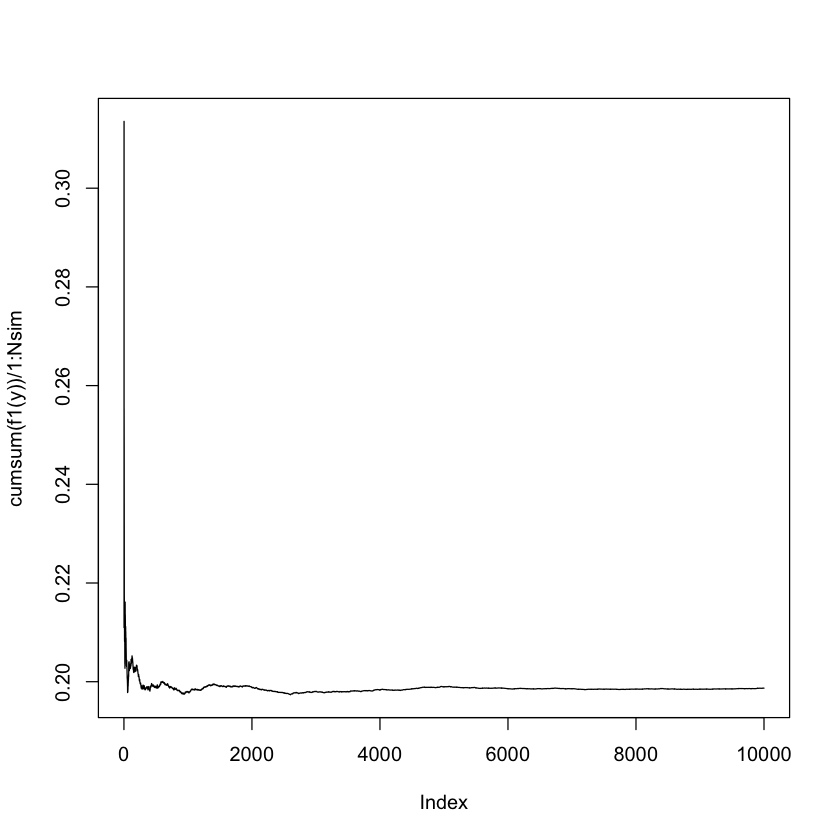

In [13]:
Nsim=10^4
y=rnorm(Nsim,x,1)

plot(cumsum(f1(y))/1:Nsim,type="l")


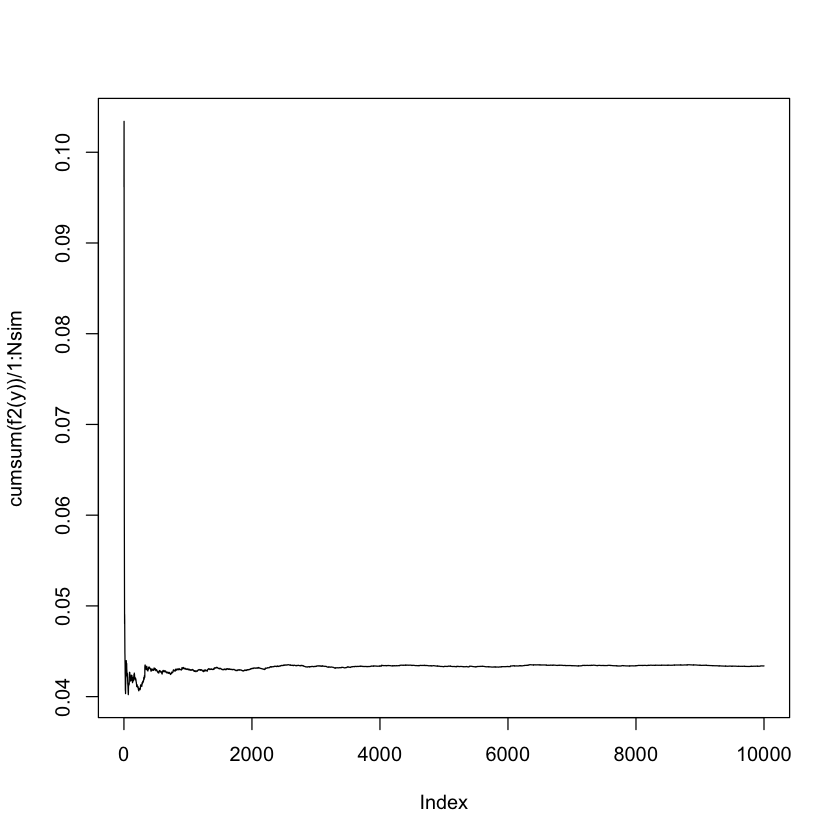

In [14]:
Nsim=10^4
y=rnorm(Nsim,x,1)
plot(cumsum(f2(y))/1:Nsim,type="l")
#abline(a=e2+0.0005,b=0,col="red")
#abline(a=e2-0.0005,b=0,col="red")

En conclusion, on constate que nos deux intégrales semblent avoir une convergence "acceptable" pour un échantillon de taille n=6000 mais notre étude précédente montre que pour avoir une précision à 3 décimales pour le quotient il faut monter à une taille de n=130 000 environ.
La vitesse de convergence de cette méthode est donc discutable.

## Exercice 3.4

<b>a) On suppose que $X \thicksim \mathcal{N}(0,\sigma^2)$ , on cherche à calculer $\mathbb{E}(e^{-X^2})$</b>

$$ \begin{aligned} \mathbb{E}(e^{-X^2})&=\int_{-\infty}^{+\infty} {\dfrac{e^{-x^2}e^{-\dfrac{x^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma}dx} 
=\int_{-\infty}^{+\infty} {\dfrac{e^{-\dfrac{x^2(1+2\sigma^2)}{2\sigma^2}}}{\sqrt{2\pi}\sigma}}dx \\
&=\dfrac{1}{\sqrt{1+2\sigma^2}}\int_{-\infty}^{+\infty} {\dfrac{\sqrt{1+2\sigma^2}}{\sqrt{2\pi}\sigma}e^{-\dfrac{x^2(1+2\sigma^2)}{2\sigma^2}}dx}
\end{aligned}
$$

On reconnaît l'intégrale $\int_{-\infty}^{+\infty} {\dfrac{\sqrt{1+2\sigma^2}}{\sqrt{2\pi}\sigma}e^{-\dfrac{x^2(1+2\sigma^2)}{2\sigma^2}}dx}$ qui est l'intégrale sur $\mathbb{R}$ de la densité d'une loi normale de paramètres : $\mathcal{N}(0,\dfrac{\sigma^2}{\sqrt{1+2\sigma^2}})$ qui vaut donc 1

On en déduit : $\mathbb{E}(e^{-X^2})=\dfrac{1}{\sqrt{1+2\sigma^2}}$

<b>b) Cas général : On suppose cette fois que $X \thicksim \mathcal{N}(\mu,\sigma^2)$ , et on cherche toujours à calculer $\mathbb{E}(e^{-X^2})$</b>

$$ \begin{aligned} \mathbb{E}(e^{-X^2})&=\int_{-\infty}^{+\infty} {\dfrac{e^{-x^2}e^{\dfrac{-(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma}dx} =\int_{-\infty}^{+\infty} {\dfrac{e^{-x^2}e^{\dfrac{-(x^2+\mu^2-2x\mu)}{2\sigma^2}}}{\sqrt{2\pi}\sigma}dx} \\
&= \dfrac{e^{\dfrac{-\mu^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma} \int_{-\infty}^{+\infty}{e^{\dfrac{-x^2(1+2\sigma^2)}{2\sigma^2}}e^{\dfrac{x\mu}{\sigma^2}}dx} = \dfrac{e^{\dfrac{-\mu^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma} \int_{-\infty}^{+\infty}{e^{\dfrac{-x^2(1+2\sigma^2)}{2\sigma^2}}e^{\dfrac{x\mu(1+2\sigma^2)}{\sigma^2(1+2\sigma^2)}}dx} \\
&=\dfrac{e^{\dfrac{-\mu^2}{2\sigma^2}}}{\sqrt{2\pi}\sigma} \int_{-\infty}^{+\infty}{e^{\dfrac{-(1+2\sigma^2)(x-\dfrac{\mu}{1+2\sigma^2})^2}{2\sigma^2}}e^{\dfrac{-\mu^2}{2\sigma^2(1+2\sigma^2)}}dx} \\
&=\dfrac{e^{\dfrac{-\mu^2}{2\sigma^2}(\dfrac{1}{1+2\sigma^2}-1)}}{\sqrt{2\pi}\sigma} \int_{-\infty}^{+\infty}{e^{\dfrac{-(1+2\sigma^2)(x-\dfrac{\mu}{1+2\sigma^2})^2}{2\sigma^2}}dx} \\
&=\dfrac{e^{\dfrac{-\mu^2}{1+2\sigma^2}}}{\sqrt{1+2\sigma^2}}\int_{-\infty}^{+\infty} {\dfrac{\sqrt{1+2\sigma^2}}{\sqrt{2\pi}\sigma}e^{\dfrac{-(1+2\sigma^2)(x-\dfrac{\mu}{1+2\sigma^2})^2}{2\sigma^2}}dx}
\end{aligned}$$

Ici on reconnaît l'intégrale $\int_{-\infty}^{+\infty} {\dfrac{\sqrt{1+2\sigma^2}}{\sqrt{2\pi}\sigma}e^{\dfrac{-(1+2\sigma^2)(x-\dfrac{\mu}{1+2\sigma^2})^2}{2\sigma^2}}dx}$ qui est l'intégrale sur $\mathbb{R}$ de la densité d'une loi normale de paramètres : $\mathcal{N}(\dfrac{\mu}{1+2\sigma^2},\dfrac{\sigma^2}{\sqrt{1+2\sigma^2}})$ qui vaut donc 1

Finalement, on en déduit : $\mathbb{E}(e^{-X^2})=\dfrac{e^{\dfrac{-\mu^2}{1+2\sigma^2}}}{\sqrt{1+2\sigma^2}}$

## Exercice 5.1

On cherche à maximiser la fonction suivante : $ f(x)=[cos(50x)+sin(20x)]^2$

<b> #a) Utilisation de la fonction optimize de R </b>

On commence par générer et tracer la fonction en question :

In [15]:
f = function(x){
    return((cos(50*x)+sin(20*x))^2)
}

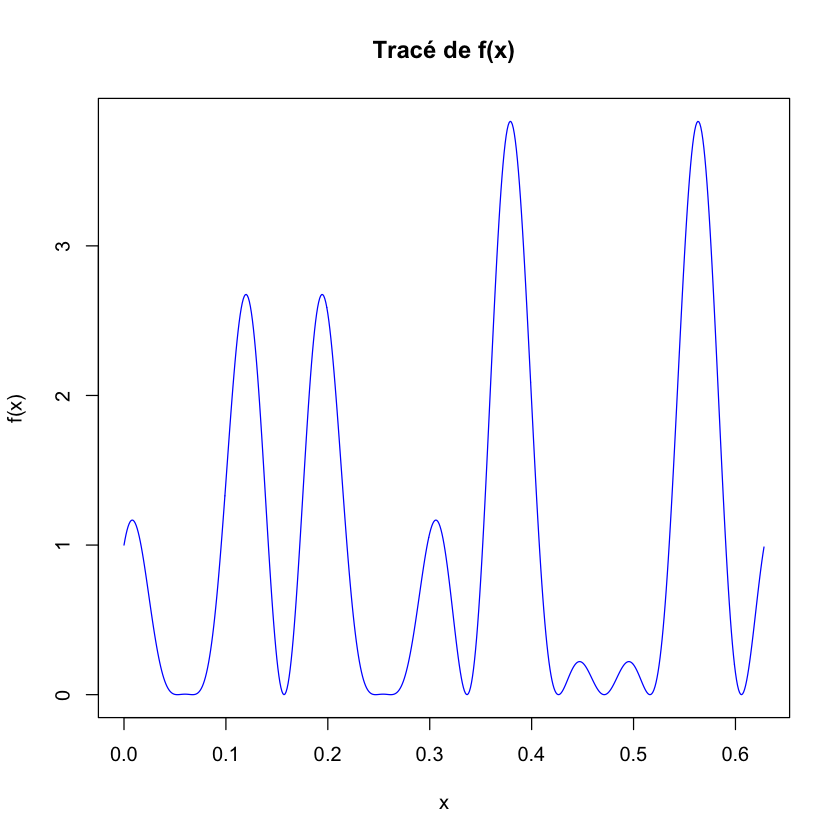

In [16]:
x51=seq(from=0,to=pi/5,by=0.001)
plot(x51,f(x51),type="l",col="blue",main="Tracé de f(x)",xlab="x",ylab="f(x)")

Il s'agit d'une fonction aux multiples extremas. La fonction étant $\dfrac{\pi}{5}$-périodique. On se limite à l'intervalle $[0,\dfrac{\pi}{5}]$ pour notre étude

In [17]:
optimize(f,x51,lower=min(x51),upper=max(x51),maximum=TRUE)

$maximum
[1] 0.3791513

$objective
[1] 3.832543

On trouve bien le "bon" maximum de la fonction.

<b> b) Utilisation d'une recherche stochastique à partir de lois uniformes </b>

L'idée ici est de générer un échantillon aléatoire sur notre compact $[0,\dfrac{\pi}{5}]$ et d'appliquer la fonction $f$ à chaque individu de l'échantillon et de chercher le maximum.

Créons notre fonction de recherche stochastique à partir de lois uniformes :

In [18]:
recherche_sto = function(f,U){
    temp<-c()
    k=1
    repeat {
    if (k==length(U)) break
    temp[k]=f(U[k])
    k<-k+1
    }
    result1=max(temp) #On cherche le maximum de vraisemblance de f
    rang=which(temp==result1) #Pour obtenir la valeur de notre échantillon uniforme maximisant la vraisemblance f
    return(U[rang]) # La fonction retourne la valeur qui maximise la vraisemblance  
}

On génère un échantillon aléatoire sur l'intervalle (compact) de notre étude $[0,\dfrac{\pi}{5}]$ :

In [37]:
Uf = runif(1000,min=0,max=pi/5)

In [38]:
recherche_sto(f,Uf)

[1] 0.3792829

On trouve une valeur très proche de celle obtenue via la fonction optimize de R

## Exercice 5.2 

<b> a) On considère la vraisemblance  de  $Z=min(X,Y)$ avec $X \thicksim \mathcal{N}(\theta,\sigma^2)$ et $Y  \thicksim \mathcal{N}(\mu,\tau^2)$ et on cherche à estimer le maximum par rapport à $\theta$ puis à $\tau$ par deux méthodes différentes :

<b> Première méthode</b> : Utilisation de la fonction optimize de R 

On fixe les autres constantes (z,$\mu$,$\sigma$,$\tau$) arbitrairement et on crée la fonction de vraisemblance par rapport à $\theta$ pour Z appellée likelyztheta :

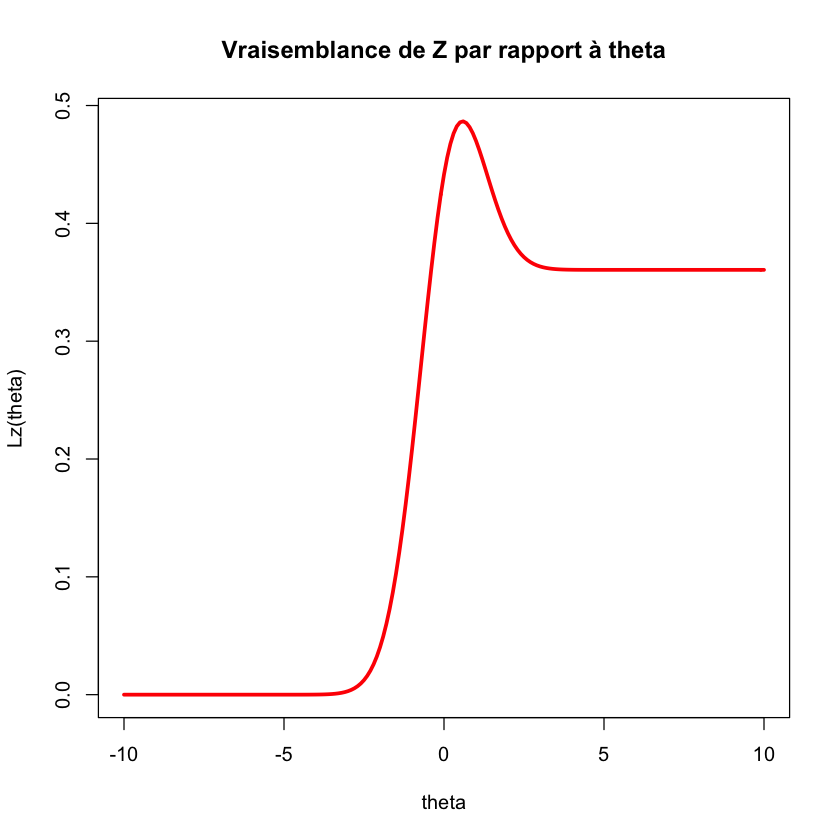

In [21]:
pas = 0.1
theta = seq(from=-10, to=10, by = pas)
likelyztheta = function(theta){
    z=0.05
    sigma=1
    tau=1
    mu=0.5   
  return((1 - pnorm((z - theta) / sigma)) *
           (1 / tau) * dnorm((z - mu) / tau) +
           (1 - pnorm((z - mu) / tau)) *
           (1 / sigma) * dnorm((z - theta) / sigma))
}
plot(theta, likelyztheta(theta),
     type = "l", lwd = 3,
     main = "Vraisemblance de Z par rapport à theta",
     xlab = "theta", ylab = "Lz(theta)", col = "red")

On cherche à donc à calculer ce maximum avec la fonction R optimize :

In [22]:
optimize(likelyztheta,theta,lower=min(theta),upper=max(theta),maximum=TRUE)$maximum

[1] 0.5852003

Cherchons la vraisemblance de Z par rapport à $\tau$ en fixant (z,$\theta$,$\mu$,$\sigma^2$): 

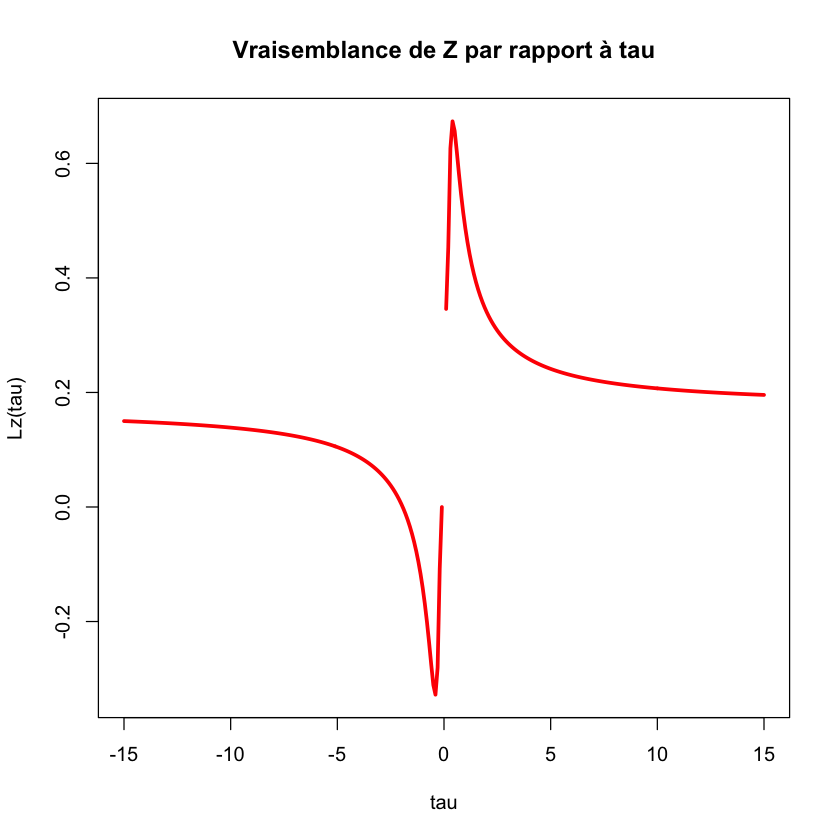

In [23]:
tau = seq(from=-15, to=15, by = pas)
likelyztau = function(tau){
    z=0.05
    sigma=1
    mu=0.5
    theta=0.585200266251986
  return((1 - pnorm((z - theta) / sigma)) *
           (1 / tau) * dnorm((z - mu) / tau) +
           (1 - pnorm((z - mu) / tau)) *
           (1 / sigma) * dnorm((z - theta) / sigma))
}
plot(tau, likelyztau(tau),
     type = "l", lwd = 3,
     main = "Vraisemblance de Z par rapport à tau",
     xlab = "tau", ylab = "Lz(tau)", col = "red")

On obtient l'estimation à partir de la fonction optimize de R suivante :

In [24]:
optimize(likelyztau,mu,lower=min(tau),upper=max(tau),maximum=TRUE)$maximum

[1] 0.4072469

<b> Deuxième méthode</b> : Recherche stochastique

On commence par chercher le maximum par rapport à $\theta$ de notre vraisemblance de la loi Z. L'étude du tracé de la vraisemblance par rapport à $\theta$ nous pousse à nous restreindre au compact [-5,5]

Nous allons réutilliser la fonction de recherche stochastique de l'exercice précédent

On génère un échantillon aléatoire de loi uniforme de taille n=10000 sur notre compact  :

In [25]:
Utheta = runif(10000,min=-5,max=5)

In [26]:
recherche_sto(likelyztheta,Utheta)

[1] 0.5852184

On effectue la même chose pour notre  max de vraisemblance de Z pour  $\tau$. D'après l'étude de la forme de la vraisemblance on se place sur le compact [-15,15] :

In [27]:
Utau = runif(10000,min=-15,max=15)

In [28]:
recherche_sto(likelyztau,Utau)

[1] 0.4057718

Les deux méthodes nous donnent des résultats très proches

<b> b) On considère ici la vraisemblance de   $W \thicksim p\mathcal{N}(\theta,\sigma^2)+(1-p)\mathcal{N}(\mu,\tau^2)$ et on cherche à estimer le maximum par rapport à $\theta$ puis à $\tau$ par deux méthodes différentes :

<b> Première méthode : Utilisation de la fonction optimize de R </b>

Ici encore,on fixe les autres constantes (w,$\mu$,$\sigma$,$\tau$) arbitrairement et on crée la fonction de vraisemblance par rapport à $\theta$ pour W appellée likelywtheta :

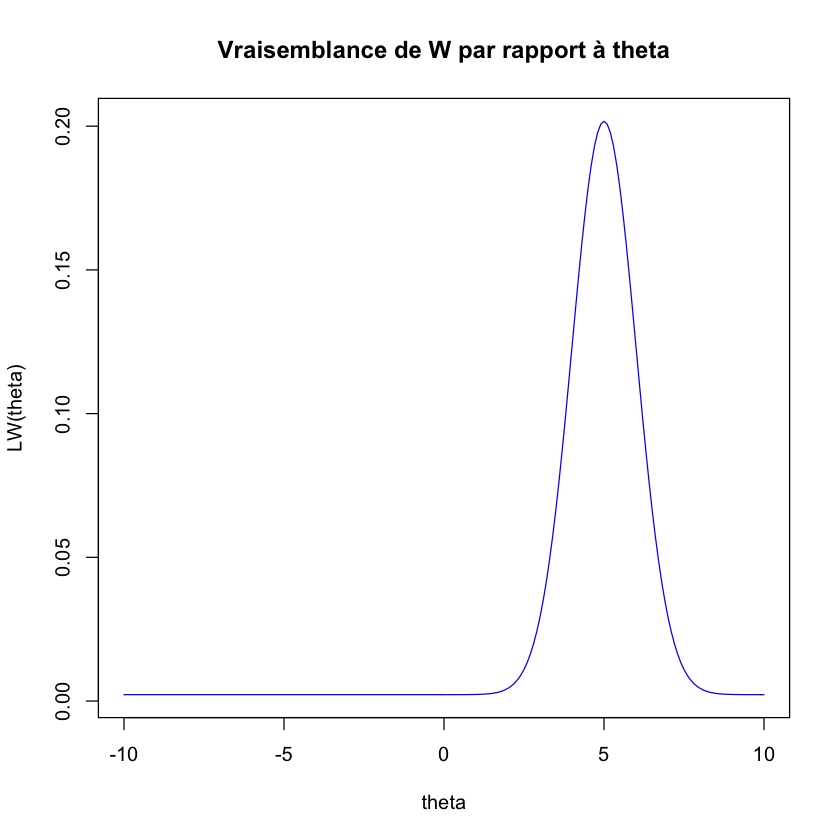

In [29]:
theta2 = seq(from=-10, to=10, by = pas)
likelywtheta = function(theta){
        sigma=1
        mu=2
        tau=1
        p=0.5
        w=5
    
  return(p * dnorm(w, theta, sigma) +
           (1 - p) * dnorm(w, mu, tau))
}

plot(theta2, likelywtheta(theta2),
     type = "l", lwd = 1,
     main = "Vraisemblance de W par rapport à theta",
     xlab = "theta", ylab = "LW(theta)", col = "blue")

On en déduit le maximum pour $\theta$ avec la fonction optimize :

In [30]:
optimize(likelywtheta,theta2,lower=min(theta2),upper=max(theta2),maximum=TRUE)$maximum

[1] 5

Effectuons la même étude pour $\tau$ : 

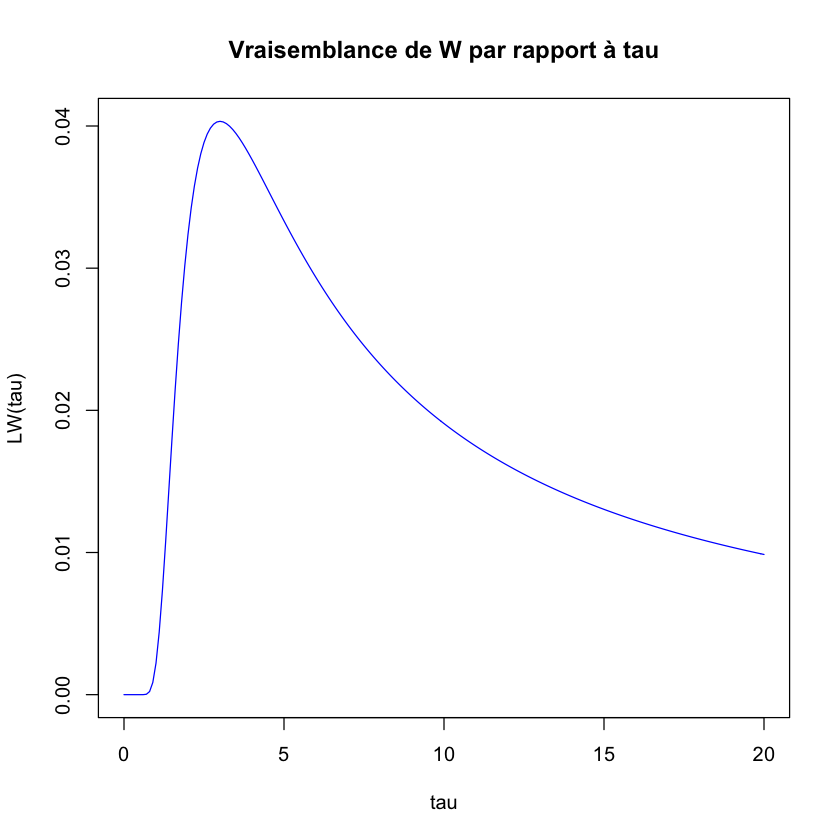

In [31]:
tau2 = seq(from=0, to=20, by = pas)
likelywtau = function(tau){
        sigma=1
        mu=2
        theta=-2
        p=0.5
        w=5
    
  return(p * dnorm(w, theta, sigma) +
           (1 - p) * dnorm(w, mu, tau))
}

plot(tau2, likelywtau(tau2),
     type = "l", lwd = 1,
     main = "Vraisemblance de W par rapport à tau",
     xlab = "tau", ylab = "LW(tau)", col = "blue")

L'application de la fonction optimize nous donne ici la valeur pour $\tau$ :

In [32]:
optimize(likelywtau,tau2,lower=min(tau2),upper=max(tau2),maximum=TRUE)$maximum

[1] 3.000013

<b> Deuxième méthode</b> : Recherche stochastique

On se fixe sur le compact [-5,5] pour $\theta$ : 

In [33]:
Utheta = runif(10000,min=-5,max=5)

In [34]:
recherche_sto(likelywtheta,Utheta)

[1] 4.999461

On se fixe sur le compact [0,20] pour $\tau$

In [35]:
Utau = runif(10000,min=0,max=20)

In [36]:
recherche_sto(likelywtau,Utau)

[1] 2.999104

Les résultats sont à nouveau très proches